# Introduction

_"Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world." -- Nvidia (Source: https://emerj.com/ai-glossary-terms/what-is-machine-learning/)_

Well, as you might already heard, machine learning is based on data. Basically machine learning algorithms use many data samples to find a generalized solution to a given problem, once unknown or new data is used. Therefore, an important task in the beginning is proper data preparation. 

Hence you will learn in the first part of this session how data can be read from files. The proper data handling is then discussed. In the next part you learn how to use and utilize your data in order to get the most out of your machine learning approach.    

<div class="alert alert-block alert-info">
<b>Note:</b> Some definitions.
<ul>
    <li> Consider a regular dataset, then one <b>sample</b> is given as a <b>row</b> and one <b>feature</b> over all samples by a <b>column</b>.
<li> All columns are features but the one you are trying to predict or reveal tendencies is called label/target.
<li> So to say, features are generally used as an input and labels as your output.

</ul>
</div>

# 1 Load Data from CSV

**First of all let's see what a CSV is.**

A very common file format for data is CSV files. This is usually a standard for small datasets. CSV is short for **C**omma **S**eparated **V**alues. A CSV file is constructed out of rows and columns, similar to a table. Columns are separated by commas (,) and each line in the file represents a row.

As mentioned in the introduction, you will now see how to load a file and convert the input data into data types (such as integers, floats, strings etc...), which then can be handled by our Python programs. The following will provide you with the basics on how to load data.

For CSV files we can use a Python standard library, which contains a `reader()` function. This function takes a file as input argument and returns a list of data rows. 

Let's get started with the code and create a function called `load_csv()`, which will take the filename as an argument and returns the dataset.

## 1.1 Dataset

During this session we use a diabetes dataset provided by the National Institute of Diabetes and Digestive and Kidney Diseases. 

"The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage." -- (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the given <code>load_csv_one()</code> function. 
<ul>
<li> Hint: It will be tested afterwards in the next code block
<li> The reader is an object that returns the rows of the file as a list of strings
<li> Use the list command or iterate the reader object to create your dataset

</ul>
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> See also https://docs.python.org/3/library/csv.html

</div>

In [87]:
from typing import *

from csv import reader
import csv

# Load a CSV file
def load_csv_one(filename: str) -> List[List[str]]:
    
    ### STUDENT CODE HERE (2pt)
    with open(filename) as csvfile:
        dataset =list(csv.reader(csvfile))
    ### STUDENT CODE until HERE
    
    return dataset

If we look at the structure of the data (p.ex. by using _Notepad++_ in the "data" folder, where the file is located), we can see, that it contains numeric data, which is seperated by commas (,) (see picture below). Let's use our written function to learn about some details of the data like the number of rows and used columns.
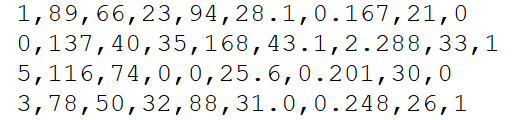

<div class="alert alert-block alert-success">
<b>Task:</b> Use your function to load the table and print the number of rows and columns it contains.

</div>

In [88]:

filename = 'data/pima-indians-diabetes.csv'

### STUDENT CODE HERE (1pt)
x = load_csv_one(filename)
datarows = print(len(x))
datacolumns = print(len(x[0]))
### STUDENT CODE until HERE


780
9


Actually, there is a small problem with our function, since it will load empty lines from the data file and add them to our list of rows. We can handle this case if we are adding only rows with data in it while skipping empty rows.

<div class="alert alert-block alert-success">
<b>Task:</b> Write an improved function for <code>load_csv()</code>, which skips empty rows.

</div>

In [89]:
def load_csv(filename: str) -> List[List[str]]:
    
    ### STUDENT CODE HERE (1pt)
    with open(filename) as csvfile:
        dataset =list(csv.reader(csvfile))
         
    dataset = [row for row in dataset if row]
    
    return dataset
    ### STUDENT CODE until HERE

# Test your new function...
dataset: List[List[str]] = load_csv(filename)
print(f'Loaded data file {filename} with {len(dataset)} rows and {len(dataset[0])} columns')

Loaded data file data/pima-indians-diabetes.csv with 768 rows and 9 columns


In general, always take a look on your data before loading it, there might be some irregularities in it, you might have to cover when loading it.

## 1.2 Convert Strings to Floats

The majority of all machine learning algorithms prefer to work with numbers, especially floating point numbers. But does our current code for loading a csv file even satisfy this demand?
Let's check it by printing one line of data.

In [90]:
print(dataset[0])
  
print(type(dataset))
print(type(dataset[0]))
print(type(dataset[0][0]))

['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']
<class 'list'>
<class 'list'>
<class 'str'>


Our current code for loading a CSV file returns a list of lists with each value being a string (str). As you might guess, now is the time to convert the strings to a floating point number.

<div class="alert alert-block alert-success">
<b>Task:</b> Create a function called <code>str_column_to_float()</code>. It takes your dataset and the index of a column as input and returns the dataset with the converted column. 
<ul>
<li> Hint: Strip any whitespace from the value before making the conversion.

</ul>
</div>

In [91]:
def str_column_to_float(dataset_new: List[List[Any]], column: int) -> List[List[Any]]:
    ### STUDENT CODE HERE (1pt)
    for row in range(len(dataset_new)):
        dataset_new[row][column] = float(dataset_new[row][column])
    return dataset_new
    ### STUDENT CODE until HERE

Now if we add this function to our previous code we can test if it is working correctly:

In [92]:
# To create a new instance of lists of lists
import copy

dataset_new: List[List[Any]] = copy.deepcopy(dataset)

print(dataset[0])

print(dataset_new[0])

# convert string columns to float
for i in range(len(dataset_new[0])):
    dataset_new = str_column_to_float(dataset_new, i)

print(dataset_new[0])

['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']
['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]


## 1.3 Convert String to Integers

Now that you know how to convert strings to floats, we learn how to convert strings to integers. This might seem to be a little bit unnecessary, but to show you that there are cases in which you might prefer to have integers instead of strings we use a different training set.

The new dataset is called "iris.csv". You can find it in the "data" folder. Also you can find more information here: http://archive.ics.uci.edu/ml/datasets/Iris

If we now take a small peek into our dataset, we see that there is numeric and character data. In the final column, which is commonly reserved to hold the outcome or the predicted value for a row, is a string.

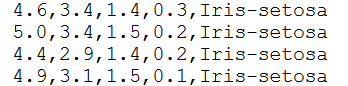

We can convert the class value to an integer by creating a "map" (aka. dictionary in Python). To do so, we take a closer look at the data and see that there are only the following values: "Iris-setsosa", "Iris-versicolor" and "Iris-virginica". The next step, is to assign each class an integer value, like: 0,1,2. In the end the value "Iris-setsosa" is assigned to value 0 and so on...

<div class="alert alert-block alert-success">
<b>Task:</b> Create a function, which first of all extract all possible values for a given column and then assigns numbers to this column. 
<ul>
<li> Your function takes the dataset and the column id as input and returns both the lookup table (a dict of the possible values and the corresponding integer values) and the changed dataset.
    <li> Hint: Take a look at the build-in <code>set()</code> constructor and the <code>dict()</code> constructor for the structure of the lookup table.
    <li> Hint2: You can use then the build-in <code>enumerate()</code> function to fill your lookup table.
<li> Then convert the column.
</ul>
</div>

In [93]:
# Convert string column to integer
def str_column_to_int(dataset: List[List[Any]], column: int) -> Tuple[Dict[str, int], List[List[Any]]]:
    
    ### STUDENT CODE HERE (1pt)
    
    my_list=[]

    for row in range(len(dataset)):

        my_list.append(dataset[row][column])
    my_list=set(my_list)
    my_list=list(my_list)
    lookup = {}
    for x in range(len(my_list)):
        lookup[my_list[x]] = x

    for row in range(len(dataset)):
        dataset[row][column]=lookup[dataset[row][column]]
    ### STUDENT CODE until HERE
    
    return lookup, dataset

At the end of this chapter, we want to use everything we learned so far and see if it works all together.

<div class="alert alert-block alert-success">
<b>Task:</b> Load the Iris Data Set and convert the first three columns to floats and the last one to an integer. In the end give the lookup table, which reveals the data behind your integer column.

</div>

In [94]:
# Load iris dataset
filename = 'data/iris.csv'

### STUDENT CODE HERE (1pt)
dataset=load_csv(filename)
str_column_to_int(dataset,-1)
### STUDENT CODE until HERE

({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2},
 [['5.1', '3.5', '1.4', '0.2', 2],
  ['4.9', '3.0', '1.4', '0.2', 2],
  ['4.7', '3.2', '1.3', '0.2', 2],
  ['4.6', '3.1', '1.5', '0.2', 2],
  ['5.0', '3.6', '1.4', '0.2', 2],
  ['5.4', '3.9', '1.7', '0.4', 2],
  ['4.6', '3.4', '1.4', '0.3', 2],
  ['5.0', '3.4', '1.5', '0.2', 2],
  ['4.4', '2.9', '1.4', '0.2', 2],
  ['4.9', '3.1', '1.5', '0.1', 2],
  ['5.4', '3.7', '1.5', '0.2', 2],
  ['4.8', '3.4', '1.6', '0.2', 2],
  ['4.8', '3.0', '1.4', '0.1', 2],
  ['4.3', '3.0', '1.1', '0.1', 2],
  ['5.8', '4.0', '1.2', '0.2', 2],
  ['5.7', '4.4', '1.5', '0.4', 2],
  ['5.4', '3.9', '1.3', '0.4', 2],
  ['5.1', '3.5', '1.4', '0.3', 2],
  ['5.7', '3.8', '1.7', '0.3', 2],
  ['5.1', '3.8', '1.5', '0.3', 2],
  ['5.4', '3.4', '1.7', '0.2', 2],
  ['5.1', '3.7', '1.5', '0.4', 2],
  ['4.6', '3.6', '1.0', '0.2', 2],
  ['5.1', '3.3', '1.7', '0.5', 2],
  ['4.8', '3.4', '1.9', '0.2', 2],
  ['5.0', '3.0', '1.6', '0.2', 2],
  ['5.0', '3.4', '1.6', '0

## 1.4 Further information on CSV files

Before you load your data, you want to get a glimpse behind the curtain, to see the shape of your data. It is important to check your dataset for the following points.

Does your dataset have file headers? This might be useful to automatically assign attributes/features to each column of data. If not, you might want to consider to name your attributes manually. 

In the next step you should check your data for comments. These are indicated in CSV-files with a # at the start of a line. It depends on the method with witch you load your dataset, but you might need to indicate, that there might occur some comments in your data.

If your data does use a tab or white space instead of a comma you should also specify this explicitly. Moreover in some CSV files values are quoted with the double quotation mark character (e.g. if your data itself contains commas). If your file differs from that, you also should specify the quote character used in your data.

Please have a look at the following code and take a look at the parameters, which are passed to the `csv.reader()` call.

In [95]:
# Load CSV Using Python Standard Library
import csv

filename = 'data/pima-indians-diabetes.csv'

with open(filename, 'rt') as raw_data:
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)

    rows: List[List[str]] = list(reader)
print(len(rows))
print(len(rows[0]))
print(rows[0])


780
9
['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']


<div class="alert alert-block alert-success">
<b>Question (2pts):</b> What can you notice if you load your data like this? Think about the type and size of the loaded dataset with respect to the functions you had to program above.
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b> Empty rows are not skipped and all values are loaded as strings </div>

## 1.5 Load CSV-Files with Pandas

In order to load CSV-files in an efficient way in many cases you want to use the `pandas` python package using the function `pandas.read_csv()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv). This function is very flexible and returns a pandas dataframe object, which you can use for summarizing and plotting directly.

Please have a look at the following code to see how pandas can be used to read data. Please note, that the `read_csv()` function is able to also take the column "names". 

In [96]:
from pandas import read_csv
import pandas as pd

filename = 'data/pima-indians-diabetes.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data: pd.DataFrame = read_csv(filename, names=names)
print(type(data)) # Get the columns and rows. Format:(rows, cols)
data

<class 'pandas.core.frame.DataFrame'>


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<div class="alert alert-block alert-success">
<b>Question (2pts):</b> What can you notice if you load your data like this? Think about the type and size of the loaded dataset with respect to the functions you had to program above.
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b> Empty rows get skipped and the values get transformed automatically into floats </div>

# 2 Understand Your Data

Now that you know how to load your data we want to give you some tools on how to get a quick overview over your data so you can decide how you can get the most out of it. 
 
You can either take a look at the data by opening it, or you can use the pandas package, which offers you a function to give you a peek into the raw data. To do so use the `.head()` function. 


<div class="alert alert-block alert-success">
<b>Task:</b> Write a piece of code, which shows you the first 20 rows of your data. For this you can directly use the data object from above.

</div>

In [97]:


### STUDENT CODE HERE (1pt)
data.head(20)
### STUDENT CODE until HERE

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<div class="alert alert-block alert-success">
<b>Question (1pts):</b> What do the different abbreviated features (preg, plas etc.) in your dataset stand for?
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> The origin of your dataset - https://www.kaggle.com/uciml/pima-indians-diabetes-database
</div>
    
<div class="alert alert-block alert-success">
<b>Answer: preg -> pregnancies, plas -> Plasma glucose concentration, pres -> Bloodpressure, skin -> skinnthickness, test -> insulin level, mass -> BMI, pedi -> Diabetes pedigree, age -> age(years), class -> outcome,diabetes or not(0 or 1)  </b></div>

In the first chapter you learned how to convert different data types. But before you can convert different datatypes you have to know which datatypes you are currently working on. The `.dtypes` attribute from the pandas tells you the datatype of each column.

In [98]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## 2.1 Descriptive Statistics

Now that we have the big picture in terms of its shape, the first lines and the datatypes of our raw data, we might also want to gain information about their attributes. The question here is what is hidden behind the different values. This also gives you the ability to estimate whether your algorithm is working correctly in the end.

The `.describe()` method lists 8 statistical properties of each attribute:

_count, mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75 Percentile and Maximum Value_

<div class="alert alert-block alert-success">
<b>Task:</b> Use the describe function on the diabetes dataset. 
<ul>
    <li> Hint: Use the <code>set_option()</code> function from pandas to set the output to a reasonable precision. Set one attribute by ('attribute', value)

</ul>
</div>

In [99]:
from pandas import set_option

### STUDENT CODE HERE (1pt)
pd.set_option("precision", 3)
description = data.describe()

### STUDENT CODE until HERE

print(description)

          preg     plas     pres     skin     test     mass     pedi      age  \
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000   
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241   
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760   
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000   
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000   
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000   
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000   
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000   

         class  
count  768.000  
mean     0.349  
std      0.477  
min      0.000  
25%      0.000  
50%      0.000  
75%      1.000  
max      1.000  


## 2.2 Class Distribution

Usually your data is not well balanced from the beginning on and there are more samples for one class than for another. This tends to require special handling in the data preparation. To get a quick idea of the status of your data you can sort it by one single attribute.

<div class="alert alert-block alert-success">
<b>Task:</b> Write a piece of code, which counts the elements of each class of the 'class' column.
</div>

In [100]:
### STUDENT CODE HERE (1pt)


class_counts = data.groupby("class").size()
    
### STUDENT CODE until HERE

print(class_counts)

class
0    500
1    268
dtype: int64


## 2.3 Correlations between Attributes

There are attributes, which usually depend on others. This is also called correlation. A common way to calculate and also measure correlations between attributes is the _Pearson's Correlation Coefficient_. This Coefficient ranges between -1 and 1 for extreme positive or negative correlation, 0 means no correlation. The pandas function `.corr()` calculates a so called _correlation matrix_. It gives the correlation of each variable with respect to all variables. The matrix is symmetric.

<div class="alert alert-block alert-success">
<b>Task/Question:</b> Use the <code>.corr()</code> method to calculate a correlation matrix and describe what you can tell from it.
</div>


<div class="alert alert-block alert-success">
<b>Answer:</b> some values are correlating strong with each other. For example the older you are, the more likely you have had multiple pregnancies. preg and preg have a correlation of 1 because they are the same data.
plasma, mass and age are correlating with class to a certain extend so those could be interessting to look at for predicting if a person has diabetes. </div>

In [101]:
### STUDENT CODE HERE (1pt)
correlations=data.corr()
### STUDENT CODE until HERE

print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


# 3 Understand Your Data With Visualization

In the last chapter we learned how to get a good insight and overview about our data. But in cases in which our data gets higher dimensional, we can't merely overlook those with numbers, we might need some visualization. In this chapter we will basically treat the same methods, but this time we will visualize them.

## 3.1 Histograms

To get an idea of the distribution of an attribute you can take a look at a histogram. From the shape of the histogram you can get a quick idea if an attribute is normal distributed or if there is a skew in it.

Histograms divide the data into its attributes. One histogram represents the attributes' values by counting their appearance in the dataset.

To generate histograms we can use a new library: `matplotlib`.

<div class="alert alert-block alert-success">
<b>Task:</b> Generate 9 histograms for each feature in our diabetes dataset. 
<ul>
    <li> Hint1: You can either use matplotlib on all features or simply use pandas <code>.hist()</code> method, which uses matplotlib to create one histogram per column. 

    <li> Hint2: Take a look at the matplotlib function <code>tight_layout()</code> and <code>show()</code>. 
</ul>
</div>

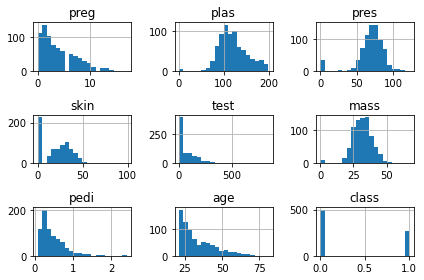

In [102]:
import matplotlib.pyplot as plt

### STUDENT CODE HERE (1pt)
data.hist(bins=20)
plt.tight_layout()
plt.show()
### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Question (2pts):</b>What can you tell from the histograms. Do they match the findings from the previous chapter? 
</div>

<div class="alert alert-block alert-success">
<b>Answer:you can see that most participants in this study are under 25 years. plas pres and mass are normal distributed. Skin and test have many values at 0 so that has to be taken into account later on. For class there are only 2 values so the visualisation in a histogram is not that usefull. </b></div>

## 3.2 Density Plots

In general a density plot works similar to a histogram. It gives you a smoother shape, since it is not limited by the occurence of values of an attribute.

<div class="alert alert-block alert-success">
<b>Task:</b> Find out how to draw a density plot and generate one for each feature. You might use implemented methods from pandas.
</div>

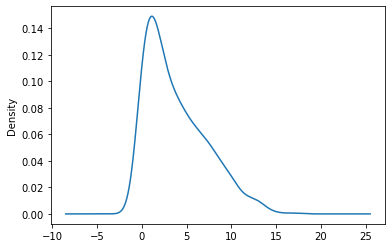

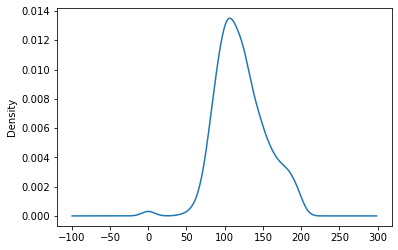

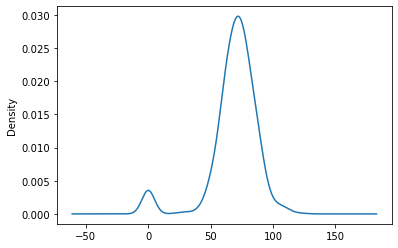

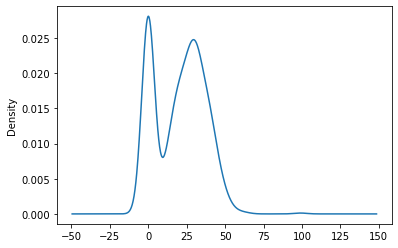

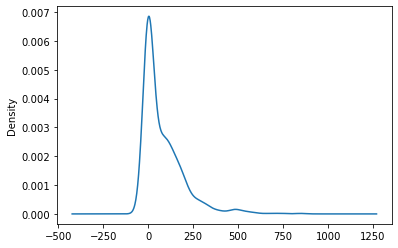

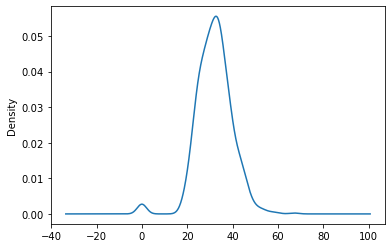

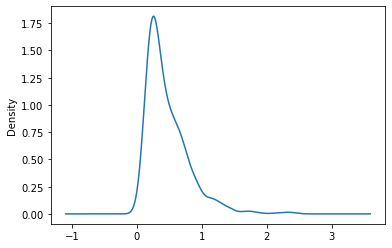

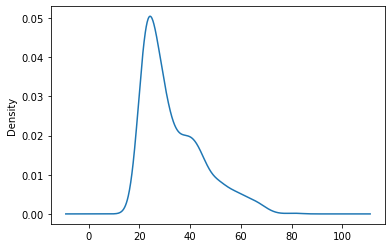

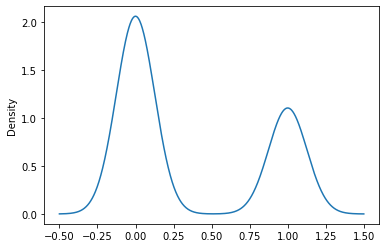

In [103]:
### STUDENT CODE HERE (1pt)
for i in range(len(data.columns)):
    data.iloc[:, i].plot.kde()
    plt.show()
### STUDENT CODE until HERE



## 3.3 Box and Whisker Plots

Another way to visualize your data are so called _boxplots_. These look kind of unfamiliar at the first look. One boxplot shows a line for the median in a box. Moreover the 25th percentile and the 75th percentile are displayed as well. Another line shows the overall range of values (https://en.wikipedia.org/wiki/Box_plot ). 

The whiskers visualize the spread of the data and the dots symbolize the data values, which are 1.5 greater than the size of the middle 50% of the data.



<div class="alert alert-block alert-success">
<b>Task:</b> Use box plots to visualize each feature. You might use implemented methods from pandas.
</div>

<AxesSubplot:>

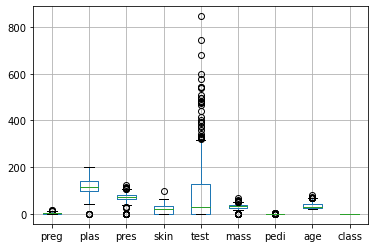

In [104]:
### STUDENT CODE HERE (1pt)

data.boxplot(names)

### STUDENT CODE until HERE

## 3.4 Multivariate plots

### 3.4.1 Correlation Matrix plot

As we mentioned in chapter 2, the correlation describes the relationship between two variables. If you have already calculated the correlation matrix you can move on by visualizing it. This is useful to get a quick overview to analyze the correlation between all attributes. Moreover, it is important to spot highly correlated attributes, since some algorithms can suffer poor performance if there are highly correlated input values.


<div class="alert alert-block alert-success">
<b>Task:</b> Create a heat map which gives you a good overview over the correlations
</div>

In [105]:
### STUDENT CODE HERE (1pt)

correlations.style.background_gradient(cmap ='coolwarm')

### STUDENT CODE until HERE

#plt.show()
#data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
plas,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedi,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


There you go, you are having a quick overview of the data. 

It seems like every attribute is positively correlated with each other, if you want to know which number symbolizes which attribute, you can customize your code and add labels to your axes. It might also be useful to annotate each cell in the heatmap.

### 3.4.2 Scatter Plot Matrix

A scatter plot matrix is one of the last methods we present to you. The scatter plot represents the relationship between two variables as dots in two dimensions, one axis for each attribute. It is possible to plot a Scatter Plot for each attribute in your data, named _Scatter Plot Matrix_. One advantage of the Scatter Plot Matrix is that you can see structured relationships between some attributes, which might indicate correlation.

<div class="alert alert-block alert-success">
<b>Task:</b> Plot such a matrix.
</div>

<div class="alert alert-block alert-success">
<b>Question (2pts):</b> What you can tell from the plot?
</div>

<div class="alert alert-block alert-success">
<b>
</b> Answer:In a scatter plot the different features are applied over each other and shown as a collection of points, so you can see trends in the data. We can see that there is a correlation between mass and skin, plas and test.   </div>

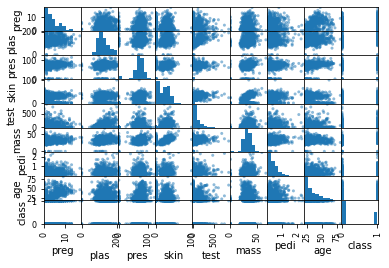

In [106]:
from pandas.plotting import scatter_matrix

### STUDENT CODE HERE (1pt)

pd.plotting.scatter_matrix(data, alpha=0.5)

### STUDENT CODE until HERE

plt.show()

## 3.5 Skew of Univariate Distributions

Many machine learning algorithms work better when using normal or gaussian distributed (see: https://en.wikipedia.org/wiki/Normal_distribution) input values. However, your data may have a skew. You may want to correct this by proper preparation of your data. Let us have a look at the skew. You can calculate this by using the pandas `.skew()` method.


<div class="alert alert-block alert-success">
<b>Task/Question (2pts):</b> Calculate the skew of the diabetes data and describe your observations in term of what the numbers show you. See also: https://en.wikipedia.org/wiki/Skewness
</div>


<div class="alert alert-block alert-success">
<b>Answer:Skewness is a measure of the asymmetry of a probability distribution, so the curve is leaning to one side or another. Negative skew commonly indicates that the "tail" is on the left side and the "steep part" is on the right side of the distribution, and positive skew indicates that the tail is on the right and the steep part is on the left. </b></div>

In [107]:
### STUDENT CODE HERE (1pt)
skew=data.skew(axis=1)
### STUDENT CODE until HERE

print(skew)

0      1.648
1      1.008
2      2.361
3      0.711
4      1.339
       ...  
763    1.229
764    1.547
765    0.908
766    1.642
767    1.149
Length: 768, dtype: float64


# 4 Scale Machine Learning data

Since we are now able to load and analyze our raw data, we are capable of the first big step in preparing our data. This step is to scale your data, because many machine learning algorithms expect scaled data as input. In this chapter we will learn how to normalize and standardize data and when you have to choose normalizing over standardizing. This is especially important for artificial neural networks and deep learning.

## 4.1 Normalize data

Normalizing should already sound familiar to you from your mathematics class. We shape the values into a range between 0 and 1. To realize this we have to know the maximum and the minimum value for each attribute. A simple option to do this, is to enumerate through the values.

<div class="alert alert-block alert-success">
<b>Task:</b> Write a function <code>dataset_minmax()</code>, which calculates the minimum and maximum for each attribute.
<ul>
    <li> Hint: Your function takes the dataset as input and returns a list with a tuple (min, max) for each column in the dataset

</ul>
</div>

In [108]:
# Find the min and max values for each column
def dataset_minmax(dataset: List[List[float]]) -> List[Tuple[float, float]]:
    
    ### STUDENT CODE HERE (1pt)
    clmn_list =[]
    minmax=[]
    for column in range(len(dataset[0])):
            
        #eine ganze column als liste speichernn,
        for row in range (len(dataset)):
            clmn_list.append(dataset[row][column])
            
        minmax.append((min(clmn_list), max(clmn_list)))
        clmn_list =[]
            
                
    ### STUDENT CODE until HERE
    return minmax

# small test dataset
dataset = [[50, 30], [20, 90]]
print(dataset)

# Calculate min and max for each column
minmax: List[Tuple[float, float]] = dataset_minmax(dataset)
print(minmax)


[[50, 30], [20, 90]]
[(20, 50), (30, 90)]


Now we can get the minimum and maximum for each column. Using these values we can add a function, which normalizes our values based on the following formula:

$$scaled\, value = \frac{value - min}{max-min}$$


<div class="alert alert-block alert-success">
<b>Task:</b> Implement this formula in a function, which is named <code>normalize_dataset()</code>.
<ul>
    <li> Hint: It uses the dataset and the minmax values and returns the normalized dataset.

</ul>
</div>

In [109]:
def normalize_dataset(dataset: List[List[float]], minmax: List[Tuple[float, float]]) -> List[List[float]]:
    
    return_dataset: List[List[float]] = []
    
    ### STUDENT CODE HERE (1pt)
    return_dataset=dataset
    for column in range(len(dataset[0])):
        
        for row in range(len(dataset)):
            return_dataset[row][column] = (dataset[row][column]-minmax[column][0])/(minmax[column][1]-minmax[column][0])
    
    

    ### STUDENT CODE until HERE
            
    return return_dataset


Now we got the necessary tools for normalizing our data. If we now put our functions together we can easily normalize our data.

In [110]:
# Again a small test dataset
dataset = [[50, 30], [20, 90], [30, 40]]
print(dataset)

# Calculate min and max for each column
minmax: List[Tuple[float, float]] = dataset_minmax(dataset)
print(minmax)

# Normalize columns
dataset: List[List[float]] = normalize_dataset(dataset, minmax)
print(dataset)

[[50, 30], [20, 90], [30, 40]]
[(20, 50), (30, 90)]
[[1.0, 0.0], [0.0, 1.0], [0.3333333333333333, 0.16666666666666666]]


Now we have to put it all together.

<div class="alert alert-block alert-success">
<b>Task:</b> Write a function called <code>load_normalized_csv()</code>, which loads a CSV file and normalizes the data afterwards.
<ul>
        <li> Hint: Your function takes the filename as input parameter and returns the normalized dataset. Use your <code>load_csv()</code> function.

</ul>
</div>

In [111]:
def load_normalized_csv(filename: str) -> List[List[float]]:
    
    ### STUDENT CODE HERE (1pt)
    
    dataset = load_csv(filename)
    for i in range(len(dataset[0])):
        dataset = str_column_to_float(dataset, i)
    minmax: List[Tuple[float, float]] = dataset_minmax(dataset)
    normalize_dataset(dataset, minmax)
    
    return dataset
    
        
    ### STUDENT CODE until HERE

## Test:
filename = 'data/pima-indians-diabetes.csv'

dataset: List[List[float]] = load_normalized_csv(filename)

print(dataset[0])

[0.35294117647058826, 0.7437185929648241, 0.5901639344262295, 0.35353535353535354, 0.0, 0.5007451564828614, 0.23441502988898377, 0.48333333333333334, 1.0]


## 4.2 Standardize data

If you standardize data you want to center your distribution on the value 0 and the standard deviation on 1. The outcome will be a Gaussian or normal distribution also called bell curve.

First of all to standardize data we have to know the mean and standard deviation of the values for each column. Therefore we will start by writing a function, which calculates the mean value for each column based on the following formula:

$$\bar{x} = \frac{\sum_{n=1}^{N} x_n}{N}$$


<div class="alert alert-block alert-success">
<b>Task:</b> Write a function <code>column_means()</code> which returns the mean value for each column.
<ul>
        <li> Hint: Your return's type is a list (with the mean for each column).

</ul>
</div>

In [112]:
def column_means(dataset: List[List[float]]) -> List[float]:
    
    ### STUDENT CODE HERE (1pt)
    s=0
    means=[]
    for column in range(len(dataset[0])):
        s=0
        for row in range(len(dataset)):
            s += dataset[row][column]
        s=s/len(dataset)
        means.append(s)
            

    ### STUDENT CODE until HERE
    
    return means

As you may know from your probability classes, the empricial standard deviation describes the average spread of the values from the mean. The following formula will help you write a function which calculates the standard deviation.


$$ s = \sqrt{\frac{\sum\nolimits_{n=1}^N(x_n - \bar{x})^2}{N -1}}$$


<div class="alert alert-block alert-success">
<b>Task:</b> Write a function <code>column_stdevs()</code> which calculates the standard deviation for each column based on the given formula.
<ul>
        <li> Hint: Your return's type is a list (with the mean for each column).

</ul>
</div>

In [113]:
from math import sqrt

def column_stdevs(dataset: List[List[float]], means: List[float]) -> List[float]:
    
    ### STUDENT CODE HERE (1pt)
    s=0
    stdevs = []
    for column in range(len(dataset[0])):
        s=0
        for row in range(len(dataset)):

            s += (dataset[row][column]-means[column])**2
            
        s=(s/(len(dataset)-1))**0.5
        stdevs.append(s)
            
            
    ### STUDENT CODE until HERE
        
    return stdevs

Now we can est our mean and the standard deviations function in a little example:

In [114]:
dataset = [[50, 30], [20, 90], [30, 50]]
print(dataset)
      
means: List[float] = column_means(dataset)
print(means)
      
stdevs: List[float] = column_stdevs(dataset, means)
print(stdevs)

[[50, 30], [20, 90], [30, 50]]
[33.333333333333336, 56.666666666666664]
[15.275252316519467, 30.550504633038933]


Now we have gathered all required tools and can start with standardizing data.

<div class="alert alert-block alert-success">
<b>Task:</b> Use a statistic method to standardize the values and write a function <code>standardize_dataset()</code> which does so.
</div>

In [115]:
def standardize_dataset(dataset: List[List[float]], means: List[float], stdevs: List[float]) -> List[List[float]]:
    return_dataset: List[List[float]] = []
    
    ### STUDENT CODE HERE (1pt)
    
    return_dataset = dataset
    
    for column in range(len(dataset[0])):
        
        for row in range(len(dataset)):
            
            return_dataset[row][column] = ((dataset[row][column]-means[column])/stdevs[column])
    
    ### STUDENT CODE until HERE
    
    return return_dataset

Now it is time to put it all together an give your standardization a try.

<div class="alert alert-block alert-success">
<b>Task:</b> Run all required functions and display your data in a histogram.
</div>

[[50, 10, 30], [20, 25, 90], [30, 40, 50]]
[33.333333333333336, 25.0, 56.666666666666664]
[15.275252316519467, 15.0, 30.550504633038933]
[[1.0910894511799618, -1.0, -0.8728715609439694], [-0.8728715609439697, 0.0, 1.091089451179962], [-0.21821789023599253, 1.0, -0.2182178902359923]]
[-1.295260195396016e-16, 0.0, 9.251858538542972e-17]
[1.0, 1.0, 1.0]


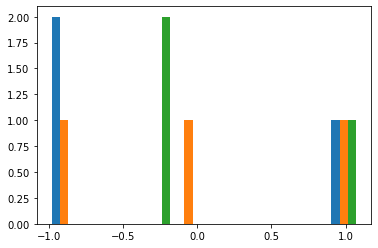

In [116]:
dataset = [[50, 10, 30], [20, 25, 90], [30, 40, 50]]
print(dataset)

### STUDENT CODE HERE (1pt)
means: List[float] = column_means(dataset)
print(means)
stdevs: List[float] = column_stdevs(dataset, means)
print(stdevs)
stddata: List[float] = standardize_dataset(dataset,means,stdevs)
print(stddata)
# check if it worked  
means2: List[float] = column_means(stddata)
print(means2)

stdevs2: List[float] = column_stdevs(stddata, means2)
print(stdevs2)


plt.hist(dataset)
plt.show()






### STUDENT CODE until HERE


Ok. Now let us also create a function which reads a given CSV file and standardizes it. 

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the <code>load_standardized_csv()</code> function.
</div>

In [117]:
def load_standardized_csv(filename: str) -> List[List[float]]:
    
    ### STUDENT CODE HERE (1pt)
    dataset: List[List[str]] = load_csv(filename)
    for i in range(len(dataset_new[0])):
        dataset = str_column_to_float(dataset_new, i)
    means: List[float] = column_means(dataset) 
    stdevs: List[float] = column_stdevs(dataset, means)
    dataset: List[float] = standardize_dataset(dataset,means,stdevs)
    return dataset
    ### STUDENT CODE until HERE

## Test:
filename = 'data/pima-indians-diabetes.csv'

dataset: List[List[float]] = load_standardized_csv(filename)
    
print(dataset[0])

# Safety check

means2: List[float] = column_means(dataset)
print(means2)

stdevs2: List[float] = column_stdevs(dataset, means2)
print(stdevs2)

# close enough

[0.6395304921176576, 0.8477713205896718, 0.14954329852954296, 0.9066790623472505, -0.692439324724129, 0.2038799072674717, 0.468186870229798, 1.4250667195933604, 1.3650063669598067]
[2.977941967093519e-17, -4.1922484002772836e-18, -7.083454193571962e-18, 3.0502221119258856e-17, 1.850371707708594e-17, 2.9660157431961784e-15, 1.9234469341341174e-15, 2.198762005800603e-16, 3.1889999900040305e-16]
[1.000000000000002, 0.9999999999999992, 1.0000000000000004, 0.9999999999999968, 1.0000000000000027, 1.0000000000000004, 1.0, 1.0000000000000009, 1.0000000000000075]


## 4.3 When to normalize and when to standardize?

Now that you know how to realize both methods, it is important to know which one has to be used. Standardization works if your data conforms to a normal distribution. If your data confirms with this, standardizing is the method of choice. If your data doesn't have a specific distribution you should consider to normalize it before you apply your machine learning algorithm.

You can also use many other data transformation methods. The idea behind this transformation is to expose the structure of your data to the learning algorithm in the best possible way. In some cases it might not be clear which transformation is the best to use. In this cases trial and error help to get kind of a feeling for transformations. 

# 5 Prepare your data for machine learning

This is the last chapter of the data preparation tutorial. As we learned in the previous chapter, it is a good idea to prepare your data in a way that exposes the unique structure of your data. Also we created a simple python code, to go one step further. We will now use the package _scikit-learn_. After completing this lesson we will be able to rescale, normalize, standardize and binarize your data. 

The scikit-learn library contains two different standard approaches for transforming data.

<div class="alert alert-block alert-success">
<b>Question (2pts):</b> Research and describe the difference.
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The standard methods of the skl library are normalizing and standardizing. Normalization means rescaling real-valued numeric attributes into a 0 to 1 range. Standardizations means rescaling the data so the mean value is 0 and the standard deviation equals to 1 </div>

## 5.1 Rescale/ Normalize data

When we normalize our dataset the maximum value becomes 1. This is useful for datasets with lots of zeros and varying scales. For example if we use algorithms where input values are weighted such as neural networks.

With scikit-learn you can use the `MinMaxScaler` class to rescale your attributes.

<div class="alert alert-block alert-success">
<b>Task:</b> Rescale/Normalize the data from the diabetes example with scikit-learn, by using the <code>MinMaxScaler</code> and print the first 5 rows of the rescaled dataset.
</div>

In [118]:
# Rescale data (between 0 and 1)
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

filename = 'data/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### STUDENT CODE HERE (1pt)

data: pd.DataFrame = read_csv(filename, names=names)
scaler1 = MinMaxScaler()
data_normalized = scaler1.fit_transform(data)
type(data_normalized)
data_normalized[0:5]

### STUDENT CODE until HERE

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333, 1.        ],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667, 0.        ],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333, 1.        ],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        , 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       , 1.        ]])

## 5.2 Standardize data

As we mentioned in the previous chapter, machine learning requires a gaussian distribution as input variables and works better with rescaled data. The output of a standardization is a distribution with a mean of zero and a standard deviation of 1.

You can standardize data by using the `StandardScaler` class in scikit-learn.

<div class="alert alert-block alert-success">
<b>Task:</b> Standardize the diabetes example by using the <code>StandardScaler</code> and print the first 5 rows of the dataset
</div>

In [119]:
from sklearn.preprocessing import StandardScaler

### STUDENT CODE HERE (1pt)
scaler2 = StandardScaler()
data_standardized = scaler2.fit_transform(data)
type(data_standardized)
data_standardized[0:5]



### STUDENT CODE until HERE

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415,  1.36589591],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944, -0.73212021],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ,  1.36589591]])

## 5.3 Normalize data

With scikit-learn's `Normalizer`class you can normalize samples to have **unit norm** (by a given norm, for example L1 or L2). See also: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization

<div class="alert alert-block alert-success">
<b>Task:</b> Normalize the diabetes example with L1-norm, by using the <code>Normalizer</code> class and print the first 5 rows of your dataset
</div>

In [120]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer

### STUDENT CODE HERE (1pt)
scaler3 = Normalizer(norm = 'l1')
data_normalized = scaler3.fit_transform(data)
type(data_normalized)
data_normalized[0:5]

### STUDENT CODE until HERE

array([[1.73296710e-02, 4.27465218e-01, 2.07956052e-01, 1.01089747e-01,
        0.00000000e+00, 9.70461576e-02, 1.81095062e-03, 1.44413925e-01,
        2.88827850e-03],
       [4.18495842e-03, 3.55721466e-01, 2.76207256e-01, 1.21363794e-01,
        0.00000000e+00, 1.11319894e-01, 1.46892041e-03, 1.29733711e-01,
        0.00000000e+00],
       [2.56433270e-02, 5.86591104e-01, 2.05146616e-01, 0.00000000e+00,
        0.00000000e+00, 7.46861898e-02, 2.15403947e-03, 1.02573308e-01,
        3.20541587e-03],
       [3.10301706e-03, 2.76168519e-01, 2.04799126e-01, 7.13693925e-02,
        2.91683604e-01, 8.71947795e-02, 5.18203850e-04, 6.51633583e-02,
        0.00000000e+00],
       [0.00000000e+00, 2.98222853e-01, 8.70723658e-02, 7.61883201e-02,
        3.65703937e-01, 9.38204742e-02, 4.98053933e-03, 7.18347018e-02,
        2.17680915e-03]])

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> What property does one sample now fulfill?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b> The values are between 0 and 1 </div>

## 5.4 Binarize data

A new method to pre-process data is binarization. As you might guess you can set a threshold and every value above it will be assigned the value one and values equal or below the threshold will be assigned the value 0.
With scikit-learn you can use the class `Binarizer`.

<div class="alert alert-block alert-success">
<b>Task:</b> Binarize the diabetes example and print the first 5 rows.
</div>

In [121]:
from sklearn.preprocessing import Binarizer

### STUDENT CODE HERE (1pt)
scaler4 = Binarizer(threshold=10)
data_binarized = scaler4.fit_transform(data)
type(data_binarized)
data_binarized[0:5]

### STUDENT CODE until HERE

array([[0., 1., 1., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0., 1., 0.]])

<div class="alert alert-block alert-success">
<b>Question:</b> Is binarizing this particular dataset useful? Explain briefly why we should or shouldn't binarize this dataset!
</div>
<div class="alert alert-block alert-success">
<b>Answer:</b> It's not usefull to binearise the whole dataset because we have different attributes with different units. So its not usefull to set a threshold </div>

# 6 Wrap up

In this session you have seen how you can properly read, understand and prepare data. This is a very important step before algorithms come into play. Remember that your algorithm can only perform well, if you have proper data!

<div class="alert alert-block alert-success">
<b>Task:</b> 
    <ul>
        <li>Summarize in three to five sentences what methods you have learned today
        <li>Make two statements about the dataset, for example the more children a person has, the older the person is on average.
        <li>You may use some plots or prints if you want to.
    </ul>
</div>
<div class="alert alert-block alert-success">
<b>Answer:</b>
At first we've learned how to how to load data from csv files,skipping empty rows , convert strings to floats/intergers and load data with panda. Then we used panda to get a quick overwiew on the data and find correlations between the different attributes. After that we used the Panda library to visualize our data in order to get a better understanding and to see more correlations. The next step was preparing our data for our machine learning algorithm by standardizing and normalizing our dataset manually. At last we used a method from the sklearn library to speed up the procces from before, additionally we binarized and we normalized the dataset with a different norm.
The higher the insulin level is the thicker the skin becomes.
The hicher glucose concentration in the plasma is the more likely the person has diabetes



    

</div>

In [122]:
correlations.style.background_gradient(cmap ='coolwarm')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
plas,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedi,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


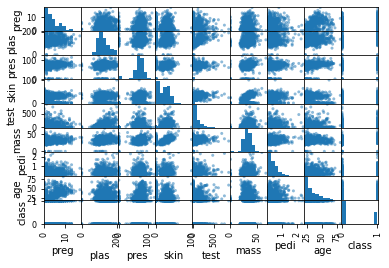

In [123]:
pd.plotting.scatter_matrix(data, alpha=0.5)
plt.show()